# Imports

In [12]:
import os, sys, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.append('..')
from prediction_denoise import prediction
from glob import glob
import librosa
import IPython.display as ipd
from signal_utils import audio_files_to_numpy, numpy_audio_to_matrix_spectrogram
from data_plot import plot_spectrogram, plot_3_spectograms
import matplotlib.pyplot as plt

# Read data

Read noisy voices to clean them up.

In [13]:
noisy_voices_list = glob('..\\data\\validation\\noisy_voice\\*')
noisy_voices_list = [os.path.basename(voice) for voice in noisy_voices_list]
print(noisy_voices_list)

['karol_birds.wav', 'karol_klawiatura.wav', 'karol_myszka.wav', 'marcin_klawiatura.wav']


# Denoising

In [14]:
def predict(audio_input_prediction, audio_output_prediction, sr=8000, name_model='model_unet'):
    # path to find pre-trained weights / save models
    weights_path = '..\\data\\weights'
    # pre trained model
    name_model = name_model
    # directory where read noisy sound to denoise
    audio_dir_prediction = '..\\data\\validation\\noisy_voice'
    # directory to save the denoise sound
    dir_save_prediction = '..\\data\\validation\\save_prediction\\'
    # Name noisy sound file to denoise
    audio_input_prediction = [audio_input_prediction]
    # Name of denoised sound file to save
    audio_output_prediction = audio_output_prediction
    # Sample rate to read audio
    sample_rate = sr
    # Minimum duration of audio files to consider
    min_duration = 1.0
    # Frame length for training data
    frame_length = 8064
    # hop length for sound files
    hop_length_frame = 8064
    # nb of points for fft(for spectrogram computation)
    n_fft = 255
    # hop length for fft
    hop_length_fft = 63
    
    prediction(weights_path, name_model, audio_dir_prediction, dir_save_prediction, audio_input_prediction,
               audio_output_prediction, sample_rate, min_duration, frame_length, hop_length_frame, n_fft,
               hop_length_fft)

In [15]:
for voice in noisy_voices_list:
    predict(audio_input_prediction=voice, audio_output_prediction=f'pred_{voice}')

Loaded model from disk
128
(22, 128, 128)
(22, 128, 128)
8064
63
Loaded model from disk
128
(22, 128, 128)
(22, 128, 128)
8064
63
Loaded model from disk
128
(18, 128, 128)
(18, 128, 128)
8064
63
Loaded model from disk
128
(5, 128, 128)
(5, 128, 128)
8064
63


# Validation

In [16]:
pred_voices_list = glob('..\\data\\validation\\save_prediction\\*')
pred_voices_list = [os.path.basename(voice) for voice in pred_voices_list]
print(pred_voices_list)

['pred_karol_birds.wav', 'pred_karol_klawiatura.wav', 'pred_karol_myszka.wav', 'pred_marcin_klawiatura.wav']


## Real data tests

### Marcins voice with keyboard

In [17]:
real_noisy, sr = librosa.load(os.path.join('..\\data\\validation\\noisy_voice',noisy_voices_list[3]), sr=8000)
real_pred, sr = librosa.load(os.path.join('..\\data\\validation\\save_prediction',pred_voices_list[3]), sr=8000)
print('Noisy voice')
ipd.display(ipd.Audio(real_noisy, rate=8000))
print('Predicted voice')
ipd.display(ipd.Audio(real_pred, rate=8000))

Noisy voice


Predicted voice


In [18]:
real_noisy_db, real_noisy_pha = numpy_audio_to_matrix_spectrogram(
    real_noisy.reshape(1,42057), int(1335 / 2) + 1, 1335, 63
)

real_pred_db, real_pred_pha = numpy_audio_to_matrix_spectrogram(
    real_pred.reshape(1,40320 ), int(1279 / 2) + 1, 1279, 63
)

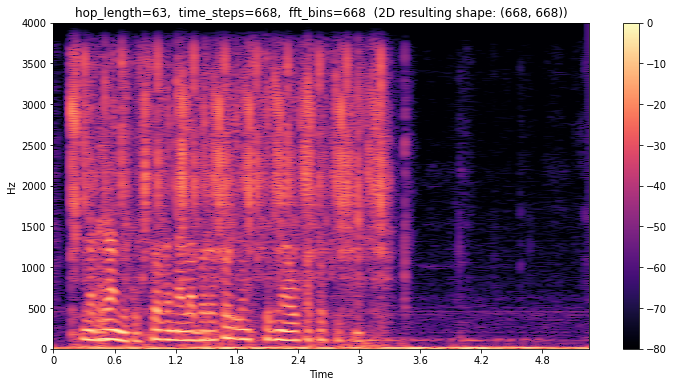

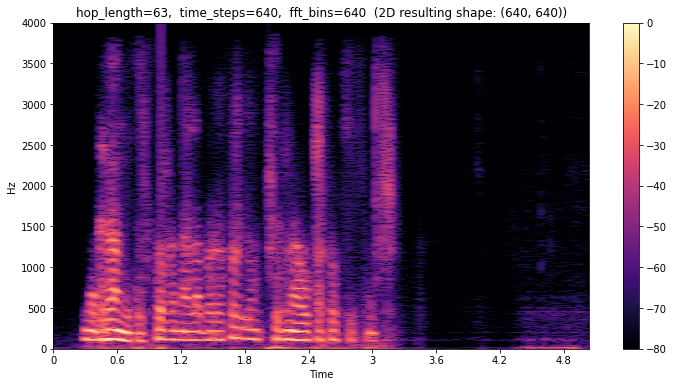

In [19]:
plot_spectrogram(
    real_noisy_db[0,:,:],
    sr,  # sample rate
    63,  # hop_length_fft
)

plot_spectrogram(
    real_pred_db[0,:,:],
    sr,  # sample rate
    63,  # hop_length_fft
)

### Karols voice with keyboard

In [20]:
real_noisy, sr = librosa.load(os.path.join('..\\data\\validation\\noisy_voice',noisy_voices_list[1]), sr=8000)
real_pred, sr = librosa.load(os.path.join('..\\data\\validation\\save_prediction',pred_voices_list[1]), sr=8000)
print('Noisy voice')
ipd.display(ipd.Audio(real_noisy, rate=8000))
print('Predicted voice')
ipd.display(ipd.Audio(real_pred, rate=8000))

Noisy voice


Predicted voice


### Karols voice with mouse clicks

In [21]:
real_noisy, sr = librosa.load(os.path.join('..\\data\\validation\\noisy_voice',noisy_voices_list[2]), sr=8000)
real_pred, sr = librosa.load(os.path.join('..\\data\\validation\\save_prediction',pred_voices_list[2]), sr=8000)
print('Noisy voice')
ipd.display(ipd.Audio(real_noisy, rate=8000))
print('Predicted voice')
ipd.display(ipd.Audio(real_pred, rate=8000))

Noisy voice


Predicted voice


## Karols voice with birds

In [22]:
real_noisy, sr = librosa.load(os.path.join('..\\data\\validation\\noisy_voice',noisy_voices_list[0]), sr=8000)
real_pred, sr = librosa.load(os.path.join('..\\data\\validation\\save_prediction',pred_voices_list[0]), sr=8000)
print('Noisy voice')
ipd.display(ipd.Audio(real_noisy, rate=8000))
print('Predicted voice')
ipd.display(ipd.Audio(real_pred, rate=8000))

Noisy voice


Predicted voice
